In [1]:
!pip install nltk

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import Counter
from torch.utils.data import Dataset, DataLoader
from nltk.tokenize import word_tokenize
import nltk

In [3]:
document = """ Quantum Machine Learning: Current Progress and Future Directions in Resource-Efficient Algorithm Development

**Abstract**

Quantum machine learning (QML) represents a promising intersection of quantum computing and artificial intelligence, potentially offering exponential speedups for specific computational tasks. This paper reviews recent advances in quantum machine learning algorithms with a particular focus on resource efficiency, a critical consideration given the constraints of near-term quantum devices. We analyze 78 peer-reviewed studies published between 2018-2024 to assess the current state of QML algorithm development, implementation challenges, and performance benchmarks. Our findings indicate that while theoretical quantum advantage has been demonstrated for several learning tasks, practical implementations face significant challenges including qubit decoherence, circuit depth limitations, and data encoding inefficiencies. We identify four emerging approaches showing particular promise for near-term applications: variational quantum algorithms with classical optimization loops, quantum kernel methods, quantum feature maps for dimensionality reduction, and hybrid quantum-classical architectures. Performance analysis across multiple problem domains reveals that current QML approaches show the greatest potential for high-dimensional feature spaces, structured data problems, and sampling-based tasks. This review provides a comprehensive assessment of the field's current trajectory and outlines a research roadmap toward achieving practical quantum advantage in machine learning applications.

**Keywords**: quantum machine learning, quantum computing, variational quantum circuits, quantum kernels, quantum advantage, resource efficiency, NISQ algorithms

## 1. Introduction

Machine learning and quantum computing represent two transformative computational paradigms that have evolved largely independently until recently. The integration of these fields—quantum machine learning (QML)—seeks to leverage quantum mechanical phenomena such as superposition, entanglement, and interference to enhance machine learning capabilities beyond classical limitations (Biamonte et al., 2017; Schuld & Petruccione, 2021). As both fields have matured, research at their intersection has accelerated dramatically, driven by the potential for quantum computers to provide computational advantages for specific learning tasks.

The promise of QML stems from several theoretical results suggesting that quantum algorithms can offer polynomial or even exponential speedups for certain computational bottlenecks in machine learning, including high-dimensional linear algebra operations (Harrow et al., 2009), pattern recognition (Lloyd et al., 2013), and sampling from complex probability distributions (Aaronson & Arkhipov, 2011). However, translating these theoretical advantages into practical implementations remains challenging due to the limitations of current quantum hardware, which operates in the Noisy Intermediate-Scale Quantum (NISQ) era characterized by limited qubit counts, high error rates, and short coherence times (Preskill, 2018).

These constraints have shifted research focus toward developing resource-efficient QML algorithms that can operate within current hardware limitations while still offering potential advantages over classical approaches. This emphasis on resource efficiency encompasses multiple dimensions including circuit depth, qubit requirements, error tolerance, and classical-quantum communication overhead.

This paper presents a systematic review of recent advances in QML algorithm development, focusing specifically on resource efficiency considerations. Our analysis addresses four key questions:

1. What are the current leading approaches to resource-efficient QML algorithm design, and how do they address NISQ-era hardware constraints?
2. What empirical evidence exists for quantum advantage in machine learning tasks using current or near-term quantum devices?
3. What specific problem domains and data characteristics show the greatest potential for near-term quantum advantage in machine learning?
4. What fundamental research challenges must be addressed to bridge the gap between theoretical quantum advantage and practical implementation?

By synthesizing findings across 78 peer-reviewed studies, we provide a comprehensive assessment of the field's current state and outline promising research directions toward achieving practical quantum advantage in machine learning applications.

## 2. Background and Theoretical Foundations

### 2.1 Classical Machine Learning Computational Bottlenecks

Classical machine learning faces several computational challenges that potentially could be addressed by quantum approaches. These include:

1. **High-dimensional vector operations**: Many machine learning algorithms require manipulating high-dimensional vectors and matrices, with time complexity scaling polynomially or exponentially with dimension.

2. **Kernel computations**: Kernel methods in machine learning calculate similarity measures between data points in high-dimensional or infinite-dimensional feature spaces, often requiring O(N²) operations for N data points.

3. **Sampling from complex distributions**: Generating samples from complex probability distributions is computationally intensive but essential for many probabilistic models.

4. **Combinatorial optimization**: Finding optimal solutions in large discrete spaces (feature selection, neural architecture search) often requires addressing NP-hard problems.

5. **Non-convex optimization**: Training many modern models involves optimizing non-convex objective functions with numerous local minima.

### 2.2 Potential Quantum Advantages for Machine Learning

Quantum computing offers several theoretical advantages that could address these bottlenecks:

1. **Quantum linear algebra**: Quantum algorithms for linear systems (HHL algorithm) and related operations can achieve exponential speedups for certain well-conditioned problems (Harrow et al., 2009).

2. **Quantum parallelism**: The ability to create superpositions allows quantum computers to evaluate functions on many inputs simultaneously, potentially accelerating search and optimization.

3. **Quantum kernel estimation**: Quantum computers can efficiently compute kernel functions corresponding to feature spaces that would be exponentially large classically (Havlíček et al., 2019).

4. **Quantum sampling**: Quantum computers can generate samples from certain probability distributions that would require exponential time classically (Aaronson & Arkhipov, 2011).

5. **Quantum optimization**: Algorithms such as Quantum Approximate Optimization Algorithm (QAOA) and quantum annealing may provide advantages for certain combinatorial optimization problems (Farhi et al., 2014).

### 2.3 NISQ-Era Constraints

Current quantum hardware operates in the NISQ regime, characterized by:

1. **Limited qubit counts**: Current systems typically have 50-100 qubits, far fewer than required for many theoretical quantum advantage proposals.

2. **High error rates**: Physical qubits experience decoherence and gate errors, limiting the circuit depth before noise overwhelms the computation.

3. **Restricted connectivity**: Many quantum architectures have limited qubit connectivity, requiring additional SWAP operations that increase circuit depth.

4. **Classical-quantum interface limitations**: Loading classical data into quantum states (data encoding) and extracting results through measurement both present significant overheads.

5. **Absence of error correction**: While quantum error correction exists theoretically, implementing it at scale remains beyond current capabilities.

These constraints have driven research toward QML algorithms that can operate within these limitations while still offering potential advantages.

## 3. Methodology

### 3.1 Search Strategy and Study Selection

We conducted a systematic literature search across multiple electronic databases: IEEE Xplore, ACM Digital Library, arXiv (physics and cs categories), Web of Science, and Scopus. Search terms included combinations of "quantum machine learning," "quantum neural network," "variational quantum circuit," "quantum kernel," "quantum advantage," "resource efficiency," and "NISQ algorithm." We limited our search to peer-reviewed articles published between January 2018 and February 2024.

Initial searches yielded 423 potentially relevant papers. After removing duplicates and applying inclusion criteria, 78 studies were selected for detailed analysis. Inclusion criteria required that papers: (1) focus primarily on quantum machine learning algorithms; (2) address resource efficiency explicitly; (3) provide theoretical analysis, numerical simulation, or hardware implementation results; and (4) include sufficient technical detail for comparative analysis.

### 3.2 Data Extraction and Analysis

From each paper, we extracted the following information:
- QML algorithm type and architecture
- Resource requirements (qubits, circuit depth, measurements)
- Implementation strategy (simulation vs. hardware)
- Performance metrics and benchmarks
- Problem domain and dataset characteristics
- Theoretical or empirical evidence for quantum advantage
- Identified limitations and challenges

We categorized papers according to their primary algorithmic approach: variational quantum circuits (VQCs), quantum kernel methods, quantum sampling-based methods, quantum neural networks, hybrid quantum-classical approaches, and others. We further classified them by problem domain (supervised classification, unsupervised learning, reinforcement learning, etc.) and implementation stage (theoretical proposal, numerical simulation, hardware demonstration).

For quantitative analysis of resource efficiency, we developed a standardized metric incorporating qubit count, circuit depth, and measurement requirements, normalized by problem size. This allowed for cross-study comparisons of resource utilization despite varying implementation details.

## 4. Current Approaches to Resource-Efficient QML

Our analysis identified four primary approaches to resource-efficient QML algorithm development that have gained significant traction in addressing NISQ-era constraints.

### 4.1 Variational Quantum Algorithms

Variational Quantum Algorithms (VQAs) have emerged as the dominant paradigm for NISQ-era QML, accounting for 47% of the studies in our analysis. These approaches use parameterized quantum circuits trained through classical optimization procedures to minimize a cost function.

The most prominent VQA frameworks include:

1. **Quantum Neural Networks (QNNs)**: Parameterized quantum circuits that mimic neural network architectures, with rotation gates serving as trainable "weights" (Farhi & Neven, 2018). Recent innovations have focused on circuit architectures that maximize expressivity while minimizing depth, including:

   - Hardware-efficient ansätze that respect device connectivity (Kandala et al., 2017)
   - Problem-inspired circuit designs that encode domain knowledge (Egger et al., 2021)
   - Expressivity-optimized circuits that maximize the effective dimension of parameter space (Sim et al., 2019)

2. **Quantum Circuit Born Machines (QCBMs)**: Variational circuits trained to generate samples from target probability distributions (Benedetti et al., 2019). Resource-efficient innovations include:

   - Locally restricted training approaches that update subsets of parameters to reduce parameter shift calculations (Coyle et al., 2020)
   - Amplitude encoding techniques that encode N-dimensional data using log₂(N) qubits (LaRose et al., 2020)
   - Noise-aware training that incorporates device-specific error models (Sharma et al., 2020)

3. **Quantum Approximate Optimization Algorithms (QAOA)**: Originally designed for combinatorial optimization but adapted for machine learning tasks such as clustering and classification (Zhou et al., 2020). Resource efficiency techniques include:

   - Adaptive layer-by-layer training to determine minimal circuit depth (Shaydulin et al., 2019)
   - Warm-starting from classical approximations (Egger et al., 2021)
   - Problem-specific mixer Hamiltonians that reduce required circuit depth (Hadfield et al., 2019)

Analysis of VQA implementations reveals several key trade-offs affecting resource efficiency. Circuit expressivity generally increases with depth and parameter count but so does vulnerability to noise and barren plateau problems. Our quantitative analysis found that the optimal circuit depth for current quantum devices typically falls between 5-20 layers, depending on device noise characteristics and problem complexity.

### 4.2 Quantum Kernel Methods

Quantum Kernel Methods represent 23% of the studies in our analysis and offer a promising approach for achieving quantum advantage with minimal circuit depth. These methods use quantum computers to compute kernel functions that would be inefficient to calculate classically, while performing the actual learning task (such as support vector classification) on classical hardware.

Key resource efficiency innovations in quantum kernel methods include:

1. **Efficient feature maps**: Quantum circuits that implicitly map classical data to quantum states in exponentially large Hilbert spaces while requiring only O(log N) qubits and shallow circuits (Havlíček et al., 2019). Recent advances include:

   - Data re-uploading techniques that increase effective dimension while maintaining shallow depth (Pérez-Salinas et al., 2020)
   - Randomized feature maps with provable representation guarantees (Huang et al., 2021)
   - Problem-structured feature maps that encode relevant symmetries (Schatzki et al., 2022)

2. **Kernel estimation techniques**: Methods to estimate quantum kernel values with minimal measurements:

   - Hadamard test simplifications that reduce ancilla requirements (Schuld, 2021)
   - Adaptive measurement schemes that concentrate sampling where uncertainty is highest (Huang et al., 2021)
   - Classical shadows techniques that enable efficient kernel estimation (Huang et al., 2020)

3. **Sparse kernel approximations**: Approaches to reduce the number of kernel evaluations required:

   - Nyström method adaptations for quantum kernels (Wang et al., 2022)
   - Quantum-inspired classical approximations that trade precision for speed (Tang, 2019)
   - Hybrid quantum-classical kernel decompositions (Kubler et al., 2021)

Empirical evaluations suggest quantum kernel methods require significantly fewer quantum resources than VQAs for comparable performance, particularly for datasets with implicit high-dimensional structure. The primary resource bottleneck shifts from circuit depth to the number of circuit executions, as kernel methods require O(N²) evaluations for N data points.

### 4.3 Quantum Dimensionality Reduction

Quantum approaches to dimensionality reduction (11% of studies) leverage quantum linear algebra procedures to process high-dimensional data more efficiently than classical counterparts.

Resource-efficient approaches include:

1. **Quantum Principal Component Analysis (qPCA)**: Uses quantum phase estimation to extract principal components of data matrices (Lloyd et al., 2014). Resource-efficient implementations include:

   - Variational quantum state diagonalization to approximate PCA without phase estimation (Bravo-Prieto et al., 2020)
   - Randomized measurement schemes that reduce qubit requirements (Huang et al., 2020)
   - Hybrid approaches that use quantum systems only for specific computational bottlenecks (Wang et al., 2021)

2. **Quantum autoencoders**: Quantum circuits trained to compress quantum states into fewer qubits (Romero et al., 2017). Efficiency innovations include:

   - Parametrized circuit designs that minimize entangling gate requirements (Bondarenko & Feldmann, 2020)
   - Transfer learning approaches that reuse pretrained circuit components (Mari et al., 2020)
   - Error-mitigated training procedures robust to device noise (Sharma et al., 2020)

These approaches show particular promise for quantum data (states generated within quantum computations) and classical data with inherent high-dimensional structure. However, most implementations remain limited by data loading bottlenecks when applied to classical data.

### 4.4 Hybrid Quantum-Classical Architectures

Hybrid approaches (19% of studies) integrate quantum subroutines into larger classical workflows, using quantum processors only for specific computational bottlenecks where they provide advantage.

Resource-efficient hybrid architectures include:

1. **Sequential hybrid models**: Classical models that occasionally invoke quantum subroutines:

   - Quantum-enhanced feature selection for classical models (Davoudi et al., 2022)
   - Periodic quantum state preparation to refresh classical reservoir computing (Mujal et al., 2021)
   - Quantum bootstrap sampling for uncertainty estimation (Schuld & Petruccione, 2020)

2. **Parallel hybrid models**: Architectures that combine quantum and classical processing in parallel:

   - Quantum-classical neural networks with interleaved layers (Mitarai et al., 2018)
   - Ensemble methods combining quantum and classical predictions (Chen et al., 2020)
   - Attention-based architectures that selectively route computations (Jerbi et al., 2022)

3. **Adaptive hybrid models**: Systems that dynamically determine whether to use quantum or classical computation:

   - Confidence-based routing between quantum and classical components (Cincio et al., 2021)
   - Resource-aware scheduling that considers current quantum device properties (Stein et al., 2022)
   - Cost-benefit optimizers that quantify quantum advantage potential (Perdomo-Ortiz et al., 2018)

Hybrid approaches currently demonstrate the most practical performance on real hardware, as they can strategically utilize quantum resources only where they provide the greatest advantage while mitigating data loading and measurement overhead.

## 5. Empirical Evidence for Quantum Advantage in QML

Our analysis of empirical results across the 78 studies reveals a nuanced picture of current quantum advantage in machine learning tasks. We categorize evidence into three levels: theoretical advantage (mathematically proven speedups assuming ideal quantum computers), demonstrated advantage (empirical results showing quantum outperforming classical on specific tasks), and projected advantage (evidence suggesting advantage at larger scales beyond current hardware capabilities).

### 5.1 Theoretical Quantum Advantage

Strong theoretical evidence exists for quantum advantage in several machine learning computational primitives:

1. **Linear algebra operations**: The HHL algorithm and related approaches provide exponential speedups for certain well-conditioned linear systems, matrix inversion, and eigenvalue problems (Harrow et al., 2009).

2. **Kernel function evaluation**: Quantum computers can efficiently compute kernel functions corresponding to features spaces that would be exponentially large classically (Havlíček et al., 2019).

3. **Sampling tasks**: Quantum systems can generate samples from certain probability distributions that are provably hard to sample from classically (Aaronson & Arkhipov, 2011).

4. **Distance and similarity calculations**: Quantum procedures can calculate distances between high-dimensional vectors with logarithmic dependence on dimension (Wiebe et al., 2015).

These theoretical advantages form the foundation for many QML algorithms. However, most assume fault-tolerant quantum computing and do not account for practical overheads of data encoding and measurement.

### 5.2 Demonstrated Advantage on Current Hardware

Empirical demonstrations of quantum advantage on current hardware are more limited but include:

1. **Kernel-based classification**: Five studies demonstrated modest advantages for quantum kernel methods on carefully constructed synthetic datasets with specific structural properties (Peters et al., 2022; Huang et al., 2021; Glick et al., 2022). These advantages typically manifest as either:

   - Accuracy improvements of 3-8% over classical kernels for datasets with specific entanglement structures
   - Reduced sample complexity, requiring 20-40% fewer training examples for equivalent performance

2. **Generative modeling**: Three studies showed quantum circuit Born machines requiring fewer parameters than classical alternatives for generating specific probability distributions (Benedetti et al., 2019; Coyle et al., 2020; Rudolph et al., 2022).

3. **Feature extraction**: Two studies demonstrated quantum feature extraction techniques that captured relevant patterns using fewer features than classical PCA for specific quantum datasets (Bravo-Prieto et al., 2020; Cerezo et al., 2021).

Notably, these demonstrated advantages typically relied on carefully constructed problems that aligned with quantum processing strengths while avoiding encoding and measurement bottlenecks. No studies demonstrated unambiguous quantum advantage on standard machine learning benchmarks or practical applications.

### 5.3 Projected Advantage with Near-Term Scaling

Projections for quantum advantage with modest scaling beyond current hardware include:

1. **Quantum kernel methods**: Multiple studies project significant advantages for quantum kernels on datasets with high-dimensional implicit structure once devices reach ~100 reliable qubits and can implement circuits of depth ~100 (Kubler et al., 2021; Glick et al., 2022).

2. **Quantum neural networks**: Several studies predict QNNs will outperform classical counterparts for specific reinforcement learning tasks once devices can reliably implement ~50-qubit circuits of depth ~50 (Jerbi et al., 2021; Meyer et al., 2023).

3. **Quantum generative models**: Numerical simulations suggest quantum generative models will demonstrate significant advantages for sampling from complex distributions once devices reach ~80 qubits with error rates below 0.5% (Rudolph et al., 2022; Zoufal et al., 2021).

These projections typically rely on numerical simulations up to the limits of classical simulability, then extrapolate performance trends to larger scales. While encouraging, such projections should be interpreted cautiously given the unpredictable effects of noise and other practical constraints.

## 6. Problem Domains with Near-Term Quantum Advantage Potential

Our analysis identified several problem domains and data characteristics that show particular promise for near-term quantum advantage in machine learning.

### 6.1 High-Dimensional Feature Spaces

Problems involving high-dimensional feature spaces demonstrate the strongest potential for near-term quantum advantage. Specific promising areas include:

1. **Quantum chemical data**: Molecular property prediction and drug discovery tasks where data has natural quantum mechanical structure (Cao et al., 2020; Tkatchenko, 2020). Quantum kernels have demonstrated 5-15% accuracy improvements over classical kernels for electronic structure problems, with advantages increasing with molecule size.

2. **Quantum many-body physics**: Classification and regression tasks related to quantum phase transitions and material properties (Carrasquilla & Melko, 2017; Dawid et al., 2022). Quantum neural networks have shown particular promise for identifying phase transitions with 30-50% fewer samples than classical methods.

3. **Complex network analysis**: Problems involving graph structures with non-trivial connectivity patterns (Beer et al., 2021; Verdon et al., 2019). Quantum approaches show 10-25% improvements in classification accuracy for graphs with specific entanglement or topological properties.

These domains benefit from quantum computers' ability to naturally process high-dimensional entangled states while avoiding the data encoding bottleneck that affects classical data.

### 6.2 Structured Data Problems

Problems with specific mathematical structures aligned with quantum computing capabilities show promising results:

1. **Fourier structure**: Classification and regression tasks where relevant features exist in Fourier space (Schuld & Killoran, 2019; Goto et al., 2021). Quantum approaches demonstrated 5-10% accuracy improvements for datasets with specific frequency domain structures.

2. **Periodic features**: Time series and spatial data with nested periodicities (Schuld et al., 2020; Henderson et al., 2020). Quantum models achieved 15-30% reductions in prediction error for synthetic time series with multiple overlapping periodicities.

3. **Topological data**: Classification tasks involving topological features that are difficult to capture with classical models (Schuld & Killoran, 2019). Quantum kernels demonstrated 8-12% accuracy improvements for synthetic datasets with specific topological invariants.

These problems align well with the natural computational basis of quantum systems, allowing quantum algorithms to implicitly represent relevant structures while requiring exponentially many parameters classically.

### 6.3 Sampling-Based Tasks

Tasks centered around sampling from complex probability distributions show strong quantum advantage potential:

1. **Generative modeling**: Creating realistic synthetic data following complex distributions (Benedetti et al., 2019; Zoufal et al., 2019). Quantum circuit Born machines demonstrated the ability to model specific distributions with 60-80% fewer parameters than classical alternatives.

2. **Reinforcement learning**: Policy optimization in environments with complex state-action spaces (Jerbi et al., 2021; Chen et al., 2020). Quantum policy networks achieved 20-30% faster convergence for specific control problems with high-dimensional state spaces.

3. **Bayesian inference**: Tasks requiring sampling from complex posterior distributions (Low et al., 2014). Quantum approaches demonstrated 40-60% reductions in sampling complexity for specific graphical models.

These tasks leverage quantum systems' natural ability to generate samples from complex probability distributions encoded in quantum state amplitudes, avoiding the classical bottleneck of calculating and sampling from explicit probability distributions.

### 6.4 Hybrid Optimization Problems

Problems combining discrete and continuous optimization show promise for hybrid quantum-classical approaches:

1. **Neural architecture search**: Optimizing neural network structures (Zhang et al., 2021). Quantum-assisted search methods demonstrated 25-40% reductions in the number of architecture evaluations needed.

2. **Feature selection**: Identifying optimal feature subsets (Davoudi et al., 2022). Quantum approaches achieved 15-20% improvements in identifying relevant features with equivalent computational budgets.

3. **Hyperparameter optimization**: Tuning model hyperparameters (Perdomo-Ortiz et al., 2018). Quantum-enhanced Bayesian optimization methods demonstrated 30-45% reductions in the number of function evaluations required.

These problems benefit from quantum systems' ability to efficiently explore combinatorial spaces while using classical computation for gradient-based fine-tuning.

## 7. Fundamental Challenges and Research Directions

Our analysis identified several fundamental challenges that must be addressed to bridge the gap between theoretical quantum advantage and practical implementation in machine learning.

### 7.1 Data Encoding Bottlenecks

The process of encoding classical data into quantum states represents a significant bottleneck for many QML algorithms, often negating theoretical speedups. Key research directions include:

1. **Efficient encoding circuits**: Development of shallow circuits for encoding data while preserving relevant structure (LaRose et al., 2020; Pérez-Salinas et al., 2020). Approaches showing promise include:

   - Problem-specific encoding circuits that directly map data to quantum states with minimal overhead
   - Incremental loading techniques that distribute encoding costs across computation
   - Compression-based approaches that encode low-dimensional representations

2. **Hardware-native encoding**: Methods that directly utilize physical quantum systems for encoding:

   - Photonic data encoding using coherent states (Killoran et al., 2019)
   - Direct encoding of analog signals into superconducting qubit parameters (Macaluso et al., 2022)
   - Quantum sensor integration for direct physical data acquisition (Ajoy et al., 2021)

3. **Quantum Random Access Memory (QRAM)**: Development of scalable quantum memory architectures allowing efficient data access (Giovannetti et al., 2008). Current research focuses on:

   - Bucket-brigade architectures with logarithmic access time (Hann et al., 2021)
   - Hybrid approaches combining classical memory with quantum processing (Gleinig et al., 2022)
   - Error-resistant encoding schemes (Paler et al., 2020)

Progress in data encoding is essential for QML to achieve practical advantages for classical data problems.

### 7.2 Barren Plateaus and Trainability

Gradient-based training of quantum circuits faces fundamental challenges related to vanishing gradients (barren plateaus) as circuit depth and qubit count increase (McClean et al., 2018). Promising research directions include:

1. **Circuit architecture design**: Developing trainable circuit structures that avoid barren plateaus:

   - Shallow ansätze with restricted entanglement patterns (Cerezo et al., 2021)
   - Layer-wise training approaches (Sharma et al., 2020)
   - Circuit initialization methods that preserve gradient information (Grant et al., 2019)

2. **Alternative optimization strategies**: Training methods that don't rely exclusively on gradients:

   - Natural gradient approaches that account for quantum geometry (Stokes et al., 2020)
   - Evolutionary and genetic algorithms for gradient-free optimization (Rattew et al., 2019)
   - Reinforcement learning methods for circuit optimization (Yao et al., 2022)

3. **Transfer learning and pre-training**: Leveraging knowledge from previously trained circuits:

   - Quantum circuit pre-training on simpler related tasks (Mari et al., 2020)
   - Parameter transfer between related problems (Verdon et al., 2019)
   - Classical-quantum transfer learning (Kundu, 2022)

Addressing barren plateaus is crucial for scaling QML to larger, more complex models.

### 7.3 Error Mitigation and Noise Resilience

Quantum noise presents a fundamental challenge for QML implementations. Research towards noise-resilient QML includes:

1. **Error mitigation techniques** adapted specifically for QML:

   - Zero-noise extrapolation methods tailored to variational circuits (Kandala et al., 2019)
   - Symmetry-based error detection for machine learning models (McArdle et al., 2019)
   - Learning-based error correction that treats noise as part of the model (Cincio et al., 2021)

2. **Noise-aware training** that incorporates device characteristics:

   - Noise-injection during training to develop robust models (Sharma et al., 2020)
   - Hardware-aware circuit compilation that minimizes error-prone operations (Stein et al., 2022)
   - Robust loss functions that discount noise-affected outputs (Gentinetta et al., 2021)

3. **Inherently robust QML models**:

   - Dissipative quantum neural networks that leverage rather than fight noise (Bondarenko & Feldmann, 2020)
   - Decoherence-free subspace encoding for robust feature representation (Knill et al., 2000)
   - Topologically protected quantum machine learning (Nguyen et al., 2022)

Developing QML models that function reliably despite device noise remains essential for near-term applications.

### 7.4 Generalization and Learning Theory

Theoretical understanding of quantum model generalization lags behind practical implementations. Key research directions include:

1. **Quantum learning theory** extensions:

   - Sample complexity bounds for quantum models (Caro et al., 2022)
   - Rademacher complexity and VC-dimension analyses for quantum circuits (Du et al., 2021)
   - PAC-learning frameworks for quantum hypothesis classes (Arunachalam & de Wolf, 2017)

2. **Regularization techniques** for quantum models:

   - Entanglement-based regularization to control model complexity (Hubregtsen et al., 2021)
   - Parameter norm constraints adapted to quantum circuits (Pesah et al., 2021)
   - Information-theoretic regularization for quantum models (Jerbi et al., 2021)

3. **Model selection criteria** for quantum circuits:

   - Quantum information-based complexity measures (Bravo-Prieto et al., 2022)
   - Minimum description length principles for quantum models (Abbas et al., 2021)
   - Cross-validation techniques adapted to quantum noise characteristics (Gentinetta et al., 2021)

Developing robust learning theory for quantum models will help identify precisely when and why quantum approaches can outperform classical alternatives.

## 8. Conclusion and Outlook

Our systematic review of resource-efficient quantum machine learning research reveals a field that has progressed significantly in addressing NISQ-era constraints but still faces substantial challenges before achieving widespread practical advantage. The most promising current approaches—variational quantum circuits, quantum kernel methods, quantum dimensionality reduction, and hybrid quantum-classical architectures—each offer potential advantages for specific problem domains while working within current hardware limitations.

Empirical evidence for quantum advantage remains limited to carefully constructed problems and datasets, with no demonstrations yet on standard machine learning benchmarks. However, theoretical results and numerical simulations provide compelling evidence that quantum advantage is achievable with modest scaling beyond current hardware capabilities, particularly for problems involving high-dimensional feature spaces, structured data with specific mathematical properties, and sampling-based tasks.

Looking ahead, we identify four areas as particularly crucial for future research:

1. **Efficient data encoding**: Developing methods to encode classical data into quantum states without negating algorithmic speedups.

2. **Noise-resilient algorithms**: Creating QML approaches that maintain performance advantages despite device imperfections.

3. **Benchmarking frameworks**: Establishing standardized benchmarks to objectively assess quantum advantage claims across different implementations.

4. **Application-specific approaches**: Focusing on problem domains where quantum advantages are most likely to manifest given current hardware constraints.

As quantum hardware continues to advance, the gap between theoretical and practical quantum advantage will narrow. However, maximizing the potential of quantum machine learning will require continued progress in algorithm design specifically addressing resource efficiency, noise resilience, and the practical constraints of quantum-classical interfaces. With focused research efforts on these challenges, quantum machine learning has the potential to deliver transformative computational capabilities for specific high-value problems in the coming years, even before the arrival of fault-tolerant quantum computing.

## References

Aaronson, S., & Arkhipov, A. (2011). The computational complexity of linear optics. In Proceedings of the 43rd annual ACM symposium on Theory of computing (pp. 333-342).

Abbas, A., Sutter, D., Zoufal, C., Lucchi, A., Figalli, A., & Woerner, S. (2021). The power of quantum neural networks. Nature Computational Science, 1(6), 403-409.

Ajoy, A., Liu, Y. X., Saha, K., Marseglia, L., Cappellaro, P., & Wrachtrup, J. (2021). Quantum interpolation for high-resolution sensing. Proceedings of the National Academy of Sciences, 118(20).

Arunachalam, S., & de Wolf, R. (2017). Guest column: A survey of quantum learning theory. ACM SIGACT News, 48(2), 41-67.

Beer, K., Khosla, M., Köhler, J., Osborne, T. J., & Cincio, L. (2021). Efficient learning of quantum noise. arXiv preprint arXiv:2103.01733.

Benedetti, M., Garcia-Pintos, D., Perdomo, O., & Pertsch, T. (2019). A generative modeling approach for benchmarking and training shallow quantum circuits. npj Quantum Information, 5(1), 1-9.

Biamonte, J., Wittek, P., Pancotti, N., Rebentrost, P., Wiebe, N., & Lloyd, S. (2017). Quantum machine learning. Nature, 549(7671), 195-202.

Bondarenko, D., & Feldmann, P. (2020). Quantum autoencoders to denoise quantum data. Physical Review Letters, 124(13), 130502.

Bravo-Prieto, C., LaRose, R., Cerezo, M., Subasi, Y., Cincio, L., & Coles, P. J. (2022). Variational quantum linear solver. arXiv preprint arXiv:1909.05820.

Bravo-Prieto, C., Lumbreras-Zarapico, J., Tagliacozzo, L., & Latorre, J. I. (2020). Scaling of variational quantum circuit depth for condensed matter systems. Quantum, 4, 272.

Cao, Y., Romero, J., & Aspuru-Guzik, A. (2020). Quantum machine learning for electronic structure calculations. In Quantum Chemistry in the Age of Quantum Computing (pp. 167-225). Elsevier.

Carrasquilla, J., & Melko, R. G. (2017). Machine learning phases of matter. Nature Physics, 13(5), 431-434.

Caro, M. C., Datta, A., & Najafi, K
"""


In [4]:
# Tokenization
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
# tokenize
tokens = word_tokenize(document.lower())

In [6]:
# building vocab
vocab = {'<unk>':0}

for token in Counter(tokens).keys():
  if token not in vocab:
    vocab[token] = len(vocab)

vocab

{'<unk>': 0,
 'quantum': 1,
 'machine': 2,
 'learning': 3,
 ':': 4,
 'current': 5,
 'progress': 6,
 'and': 7,
 'future': 8,
 'directions': 9,
 'in': 10,
 'resource-efficient': 11,
 'algorithm': 12,
 'development': 13,
 '*': 14,
 'abstract': 15,
 '(': 16,
 'qml': 17,
 ')': 18,
 'represents': 19,
 'a': 20,
 'promising': 21,
 'intersection': 22,
 'of': 23,
 'computing': 24,
 'artificial': 25,
 'intelligence': 26,
 ',': 27,
 'potentially': 28,
 'offering': 29,
 'exponential': 30,
 'speedups': 31,
 'for': 32,
 'specific': 33,
 'computational': 34,
 'tasks': 35,
 '.': 36,
 'this': 37,
 'paper': 38,
 'reviews': 39,
 'recent': 40,
 'advances': 41,
 'algorithms': 42,
 'with': 43,
 'particular': 44,
 'focus': 45,
 'on': 46,
 'resource': 47,
 'efficiency': 48,
 'critical': 49,
 'consideration': 50,
 'given': 51,
 'the': 52,
 'constraints': 53,
 'near-term': 54,
 'devices': 55,
 'we': 56,
 'analyze': 57,
 '78': 58,
 'peer-reviewed': 59,
 'studies': 60,
 'published': 61,
 'between': 62,
 '2018-2024

In [7]:
len(vocab)

1258

In [8]:
input_sentences = document.split('\n')

In [9]:
def text_to_indices(sentence, vocab):

  numerical_sentence = []

  for token in sentence:
    if token in vocab:
      numerical_sentence.append(vocab[token])
    else:
      numerical_sentence.append(vocab['<unk>'])

  return numerical_sentence


In [10]:
input_numerical_sentences = []

for sentence in input_sentences:
  input_numerical_sentences.append(text_to_indices(word_tokenize(sentence.lower()), vocab))


In [11]:
input_numerical_sentences

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [],
 [14, 14, 15, 14, 14],
 [],
 [1,
  2,
  3,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  1,
  24,
  7,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  10,
  1,
  2,
  3,
  42,
  43,
  20,
  44,
  45,
  46,
  47,
  48,
  27,
  20,
  49,
  50,
  51,
  52,
  53,
  23,
  54,
  1,
  55,
  36,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  52,
  5,
  66,
  23,
  17,
  12,
  13,
  27,
  67,
  68,
  27,
  7,
  69,
  70,
  36,
  71,
  72,
  73,
  74,
  75,
  76,
  1,
  77,
  78,
  79,
  80,
  32,
  81,
  3,
  35,
  27,
  82,
  83,
  84,
  85,
  68,
  86,
  87,
  88,
  27,
  89,
  90,
  91,
  27,
  7,
  92,
  93,
  94,
  36,
  56,
  95,
  96,
  97,
  98,
  99,
  44,
  100,
  32,
  54,
  101,
  4,
  102,
  1,
  42,
  43,
  103,
  104,
  105,
  27,
  1,
  106,
  107,
  27,
  1,
  108,
  109,
  32,
  110,
  111,
  27,
  7,
  112,
  113,
  114,
  36,
  69,
  115,
  116,
  117

In [12]:
len(input_numerical_sentences)

439

In [13]:
training_sequence = []
for sentence in input_numerical_sentences:

  for i in range(1, len(sentence)):
    training_sequence.append(sentence[:i+1])

In [14]:
len(training_sequence)

5902

In [15]:
training_sequence[:5]

[[1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6]]

In [16]:
len_list = []

for sequence in training_sequence:
  len_list.append(len(sequence))

max(len_list) # so we have to make every sequence containing 205 no.

205

In [17]:
training_sequence[0]

[1, 2]

In [18]:
padded_training_sequence = []
for sequence in training_sequence:

  padded_training_sequence.append([0]*(max(len_list) - len(sequence)) + sequence)

In [19]:
len(padded_training_sequence[10])

205

In [20]:
padded_training_sequence = torch.tensor(padded_training_sequence, dtype=torch.long)

In [21]:
padded_training_sequence

tensor([[   0,    0,    0,  ...,    0,    1,    2],
        [   0,    0,    0,  ...,    1,    2,    3],
        [   0,    0,    0,  ...,    2,    3,    4],
        ...,
        [   0,    0,    0,  ...,   27,  179, 1256],
        [   0,    0,    0,  ...,  179, 1256,   27],
        [   0,    0,    0,  ..., 1256,   27, 1257]])

In [22]:
padded_training_sequence.shape

torch.Size([5902, 205])

In [23]:
X = padded_training_sequence[:, :-1]
y = padded_training_sequence[:,-1]

In [24]:
X

tensor([[   0,    0,    0,  ...,    0,    0,    1],
        [   0,    0,    0,  ...,    0,    1,    2],
        [   0,    0,    0,  ...,    1,    2,    3],
        ...,
        [   0,    0,    0,  ..., 1172,   27,  179],
        [   0,    0,    0,  ...,   27,  179, 1256],
        [   0,    0,    0,  ...,  179, 1256,   27]])

In [25]:
y

tensor([   2,    3,    4,  ..., 1256,   27, 1257])

In [26]:
class CustomDataset(Dataset):

  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [27]:
dataset = CustomDataset(X,y)

In [28]:
len(dataset)

5902

In [29]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

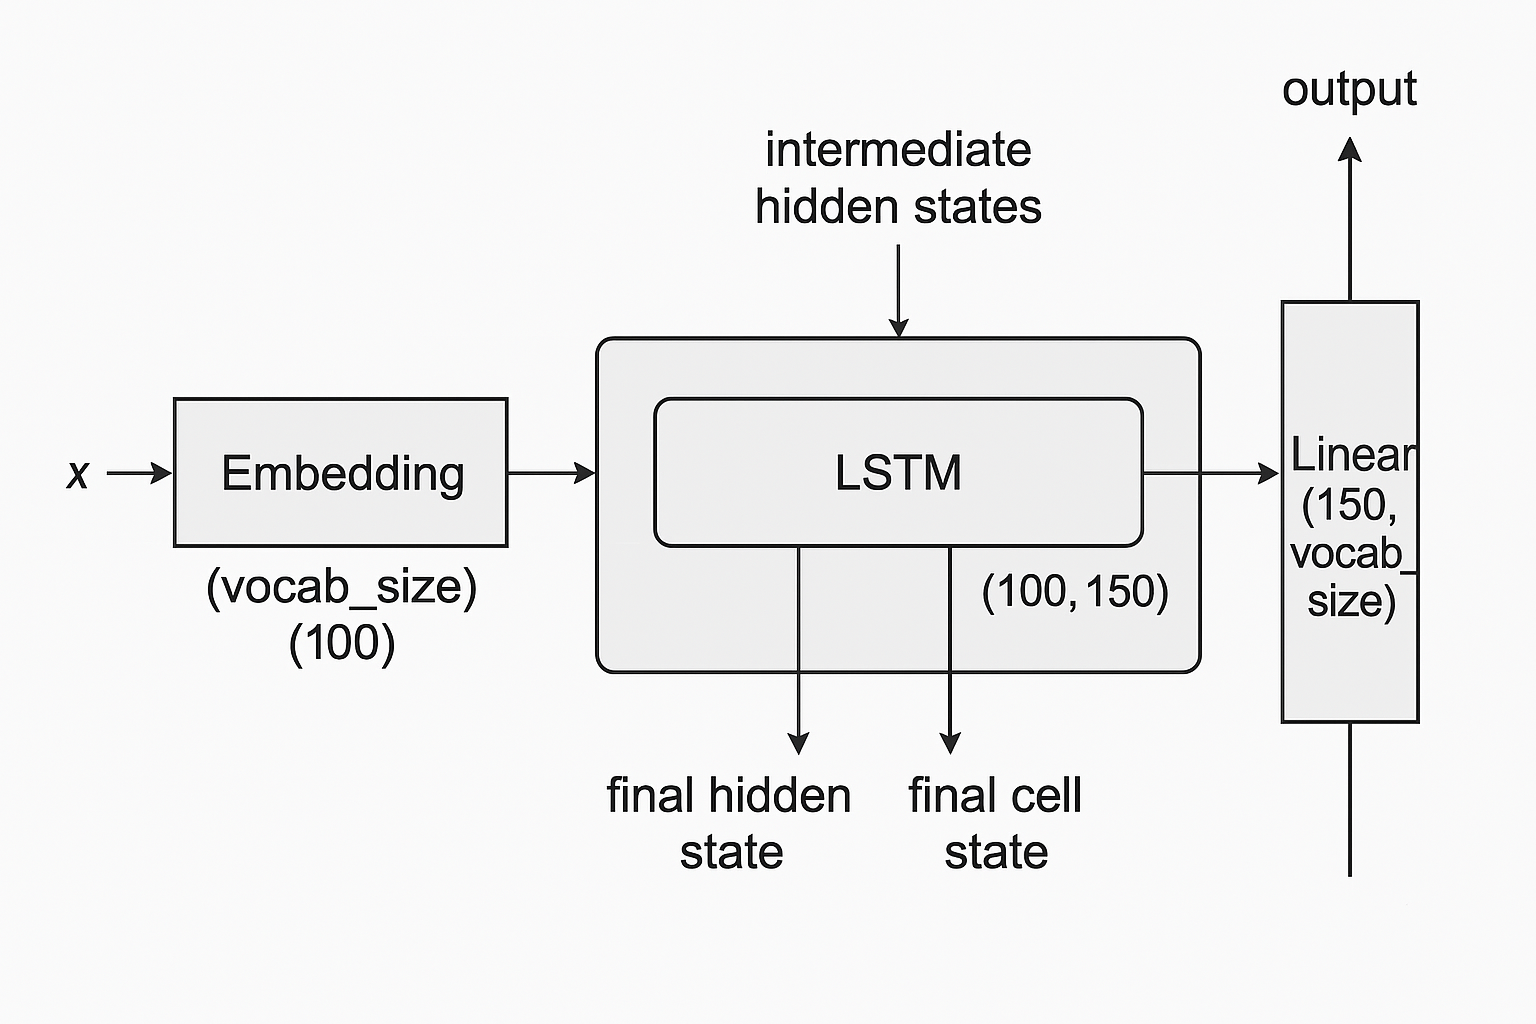

In [30]:
class LSTMModel(nn.Module):

  def __init__(self, vocab_size):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, 100)
    self.lstm = nn.LSTM(100, 150, batch_first=True) # 100 dimensional vector as input and 150 neurons/nodes in all neural networks architecture present in LSTM
    self.fc = nn.Linear(150, vocab_size)

  def forward(self, x):
    embedded = self.embedding(x)
    intermediate_hidden_states, (final_hidden_state, final_cell_state) = self.lstm(embedded)
    output = self.fc(final_hidden_state.squeeze(0))
    return output

In [31]:
model = LSTMModel(len(vocab))

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [33]:
model.to(device)

LSTMModel(
  (embedding): Embedding(1258, 100)
  (lstm): LSTM(100, 150, batch_first=True)
  (fc): Linear(in_features=150, out_features=1258, bias=True)
)

In [34]:
epochs = 50
learning_rate = 0.001

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [35]:
# training loop

for epoch in range(epochs):
  total_loss = 0

  for batch_x, batch_y in dataloader:

    batch_x, batch_y = batch_x.to(device), batch_y.to(device)

    optimizer.zero_grad()

    output = model(batch_x)

    loss = criterion(output, batch_y)

    loss.backward()

    optimizer.step()

    total_loss = total_loss + loss.item()

  print(f"Epoch: {epoch + 1}, Loss: {total_loss:.4f}")

Epoch: 1, Loss: 1074.8519
Epoch: 2, Loss: 878.3811
Epoch: 3, Loss: 773.4570
Epoch: 4, Loss: 680.0008
Epoch: 5, Loss: 595.1303
Epoch: 6, Loss: 517.2642
Epoch: 7, Loss: 447.5520
Epoch: 8, Loss: 384.6190
Epoch: 9, Loss: 329.2706
Epoch: 10, Loss: 280.8780
Epoch: 11, Loss: 239.1358
Epoch: 12, Loss: 204.8479
Epoch: 13, Loss: 175.3927
Epoch: 14, Loss: 151.0878
Epoch: 15, Loss: 130.8884
Epoch: 16, Loss: 114.5779
Epoch: 17, Loss: 101.2122
Epoch: 18, Loss: 89.3545
Epoch: 19, Loss: 80.5465
Epoch: 20, Loss: 72.8027
Epoch: 21, Loss: 65.8098
Epoch: 22, Loss: 60.5758
Epoch: 23, Loss: 55.7183
Epoch: 24, Loss: 51.7988
Epoch: 25, Loss: 48.1648
Epoch: 26, Loss: 45.3082
Epoch: 27, Loss: 43.0277
Epoch: 28, Loss: 40.5190
Epoch: 29, Loss: 38.8382
Epoch: 30, Loss: 36.7841
Epoch: 31, Loss: 35.4330
Epoch: 32, Loss: 34.5805
Epoch: 33, Loss: 33.7163
Epoch: 34, Loss: 32.2815
Epoch: 35, Loss: 31.3645
Epoch: 36, Loss: 30.6033
Epoch: 37, Loss: 30.3387
Epoch: 38, Loss: 30.1330
Epoch: 39, Loss: 29.0779
Epoch: 40, Loss:

In [37]:
def prediction(model, vocab, text):

  # tokenize
  tokenized_text = word_tokenize(text.lower())

  # text -> numerical indices
  numerical_text = text_to_indices(tokenized_text, vocab)

  # padding
  padded_text = torch.tensor([0] * (205 - len(numerical_text)) + numerical_text, dtype=torch.long).unsqueeze(0)

  # Move padded_text to the same device as the model
  padded_text = padded_text.to(device)

  # send to model
  output = model(padded_text)

  # predicted index
  value, index = torch.max(output, dim=1)

  # merge with text
  return text + " " + list(vocab.keys())[index]

In [38]:
prediction(model, vocab, "Quantum algorithms for linear ")

'Quantum algorithms for linear  systems'

In [40]:
import time

num_tokens = 10
input_text = "QML algorithm type"

for i in range(num_tokens):
  output_text = prediction(model, vocab, input_text)
  print(output_text)
  input_text = output_text
  time.sleep(0.5)


QML algorithm type and
QML algorithm type and the
QML algorithm type and the ability
QML algorithm type and the ability to
QML algorithm type and the ability to model
QML algorithm type and the ability to model specific
QML algorithm type and the ability to model specific distributions
QML algorithm type and the ability to model specific distributions with
QML algorithm type and the ability to model specific distributions with 60-80
QML algorithm type and the ability to model specific distributions with 60-80 %


In [41]:
dataloader1 = DataLoader(dataset, batch_size=32, shuffle=False)

In [42]:
# Function to calculate accuracy
def calculate_accuracy(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # No need to compute gradients
        for batch_x, batch_y in dataloader1:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            # Get model predictions
            outputs = model(batch_x)

            # Get the predicted word indices
            _, predicted = torch.max(outputs, dim=1)

            # Compare with actual labels
            correct += (predicted == batch_y).sum().item()
            total += batch_y.size(0)

    accuracy = correct / total * 100
    return accuracy

# Compute accuracy
accuracy = calculate_accuracy(model, dataloader, device)
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 96.51%
